In [88]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import math
from world import World
from utils import  getpolicy, getvalue, heatmap_function
import IPython.display as display
plt.rcParams['figure.facecolor']='white'

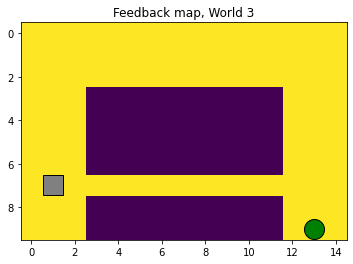

In [92]:
# Initialization
# Initialize the world, Q-table, and hyperparameters
world = 3
W = World(world)
W.draw()
# initial Q with random value (-1,0)
# the action  for point x,y is Q[x*y+y-1,:]
Q = (np.round(np.random.random((4,W.y_size,W.x_size)),4)-1.5)/1000
if W.world == 4:
    Q = np.zeros((4,W.y_size,W.x_size))
Q[0,9,:] = -math.inf
Q[1,0,:] = -math.inf
Q[2,:,14] = -math.inf
Q[3,:,0] = -math.inf
#learning rate
# 终点是 self.term
# 起点是 self.pos

In [93]:
start = W.pos

iter 4000


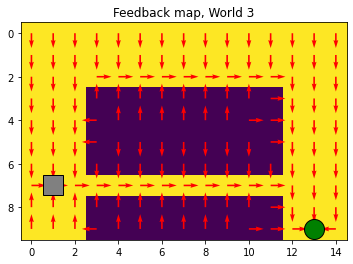

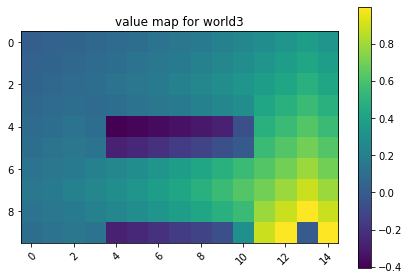

last iteration need 685 step to reach the term)


In [94]:
# Training loop
# Train the agent using the Q-learning algorithm.
#[1,2,3,4] ==[down,up,right,left]

# Q(s,a) = (1-eta)*Q(s,a) + eta*[r+gamma*max[Q(s',a')]]

# 0.6 0 0.1 0.5 r=0

max_try_each_iter = 5000
itertion = 6000
if W.world == 4:
    eta = 0.01
    gamma = 0.97
    itertion = 8000  
else :
    eta = 0.2
    gamma = 0.9

for i in range(itertion):
    current_try = 0
    if i/itertion <0.5:
        eps = 0.8
    elif  i/itertion <0.8: 
        eps = 0.6
    elif  i/itertion <1:  
        eps = 0.2
    W = World(world)
    #W.pos = start
    if i % 2000 == 0:
        display.clear_output(wait=True)
        W.draw(policy = getpolicy(Q))
        print('iter {}'.format(i))
    while W.pos!=W.term:
        current_info = None
        if np.random.rand() <= eps:
            action = np.random.randint(1,5) #here we have 1,2,3,4. 
        else:
            action = np.argmax([Q[0,W.pos[0],W.pos[1]],Q[1,W.pos[0],W.pos[1]],Q[2,W.pos[0],W.pos[1]],Q[3,W.pos[0],W.pos[1]]])+1
        # cur is (action,y,x,Q(s,a))
        current_info = (action,W.pos[0],W.pos[1],Q[action-1,W.pos[0],W.pos[1]])
        # do the action, now the pos has been updated
        valid, feed = W.action(action)
        # if not valid redo action
        if valid == 0:
            W.pos = (current_info[1],current_info[2])
        r = feed
        if W.pos == W.term:
            r = 1
        if W.pos == W.term and W.world==4:
            r = 0
        
        # find the best action for s' state
        best_action = np.argmax([Q[0,W.pos[0],W.pos[1]],Q[1,W.pos[0],W.pos[1]],Q[2,W.pos[0],W.pos[1]],Q[3,W.pos[0],W.pos[1]]])+1
        score = Q[best_action-1,W.pos[0],W.pos[1]]
        # Here current_info is the last step, the action has already been taken
        Q[current_info[0]-1,current_info[1],current_info[2]] = (1-eta)*current_info[3] + eta*(r+gamma*score)
        current_try += 1
heatmap_function(getvalue(Q),'value map for world{}'.format(W.world))
print('last iteration need {} step to reach the term)'.format(current_try))


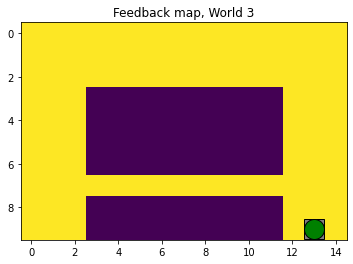

In [54]:
W.pos = start

while W.pos!=W.term :
    action = getpolicy(Q)[W.pos[0],W.pos[1]]
    W.action(action)
    W.draw()

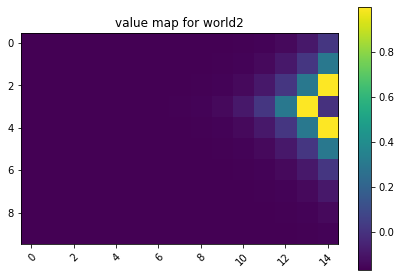

In [28]:
#print('total value: {}'.format(value))

np.set_printoptions(suppress=True)
heatmap_function(getvalue(Q),'value map for world{}'.format(W.world))

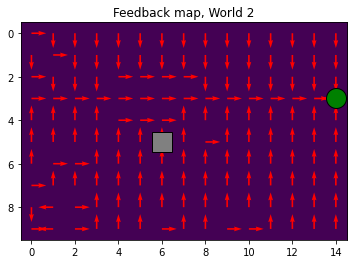

In [29]:
W.pos = start
W.draw(policy = getpolicy(Q))